# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import math
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

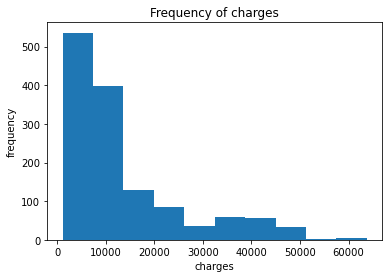

In [4]:
_= plt.hist(medical['charges'])
_= plt.xlabel('charges')
_= plt.ylabel('frequency')
_= plt.title('Frequency of charges')
plt.show()

In [5]:
mean = np.mean(medical['charges'])
print('Mean of charges is ', mean)
std = np.std(medical['charges'], ddof=1)
print('Sample standard deviation of charges is ', std)

Mean of charges is  13270.422265141257
Sample standard deviation of charges is  12110.011236693994


The charges distribution is right skewed. Sample mean is located to the left of the distribution, which makes sense. To calculate the standard deviation, I used N-1 as the denominator since it gives the best estimate for the population distribution. Sample standard deviation is quite high.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 
Statistical tests require several assumptions:
1. The sample must be randomly selected.
2. Data should be drawn from normal distributions or larger samples. (If the sample size is sufficiently large (>50), based on CLT we know that the sampling distribution of the mean will be approximately normal.)

In this case, it is mentioned that data represent a random sample and since sample size is 1338 (>50), we can go forward with hypothesis testing.

 One sample t-test would be appropriate for this. <br>
\begin{equation}
H_0 : \mu >= 12000 
\end{equation}

\begin{equation}
H_1 : \mu < 12000
\end{equation}

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One-sided interval is appropriate.

In [6]:
n = len(medical['charges'])
critical_value = round(t.ppf(1-0.95, df = n-1),2)
print('critical value is ', abs(critical_value))

critical value is  1.65


In [9]:
conf_int = mean-(critical_value*(std/np.sqrt(n)))
print('95% confidence interval for the population mean is ', (np.inf, conf_int, ))

95% confidence interval for the population mean is  (inf, 13816.683564762132)


We can have 95% confidence that the population mean lies between 13816.68 and infinity. So, the administrator need not be concerned on this.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Comparing the sample means of two independent populations to determine if the sampled populations could have the same mean. <br>
\begin{equation}
H_0 : \mu_0-\mu_1 = 0 
\end{equation}

\begin{equation}
H_1 : \mu_0-\mu_1 \neq 0
\end{equation}

The assumptions are, <br>
1. The populations are independent. <br>
2. The population variances are equal. <br>
3. Either population is normal or sample size is large. <br>

t-value follows the t-distribution with degrees of freedom of n0+n1-2


In [69]:
df0 = medical[medical['insuranceclaim'] == 0]
df1 = medical[medical['insuranceclaim'] == 1]

In [82]:
n0 = len(df0['charges'])
n1 = len(df1['charges'])
x0 = np.mean(df0['charges'])
x1 = np.mean(df1['charges'])
s0 = np.std(df0['charges'], ddof = 1)
s1 = np.std(df1['charges'], ddof = 1)
print('sample sizes are ', n0 , 'and', n1)
print('sample means are ', x0 , 'and', x1)
print('sample satandard deviations are ', s0 , 'and', s1)

sample sizes are  555 and 783
sample means are  8821.421892306294 and 16423.928276537663
sample satandard deviations are  6446.510126811736 and 14045.928418802127


In [76]:
pooled_var = np.sqrt(((n0-1)*(s0**2)+(n1-1)*(s1**2))/(n0+n1-2))
t_stat = (x0-x1)/(pooled_var*np.sqrt((1/n0)+(1/n1)))
print('t-statistic is ', t_stat)

t-statistic is  -11.89329903087671


In [93]:
df = n0+n1-2
p_val = t.cdf(t_stat,df=df)*2 #multiple by 2 since it is a 2-sided test
print('p-value is ', p_val)

p-value is  4.461230231620972e-31


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [95]:
from scipy.stats import ttest_ind_from_stats
t_stat, p_val = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=True)
print('t-statistic is', t_stat, 'and the p-value is', p_val)

t-statistic is -11.893299030876712 and the p-value is 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0) <br>
test for mean based on normal distribution, one or two samples. In the case of two samples, the samples are assumed to be independent.


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test